# Import Libraries

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load The Dataset

In [171]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Save As A Pandas Dataframe

In [172]:
df = pd.DataFrame(titanic)
df 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Box Plot To Show Outliers 

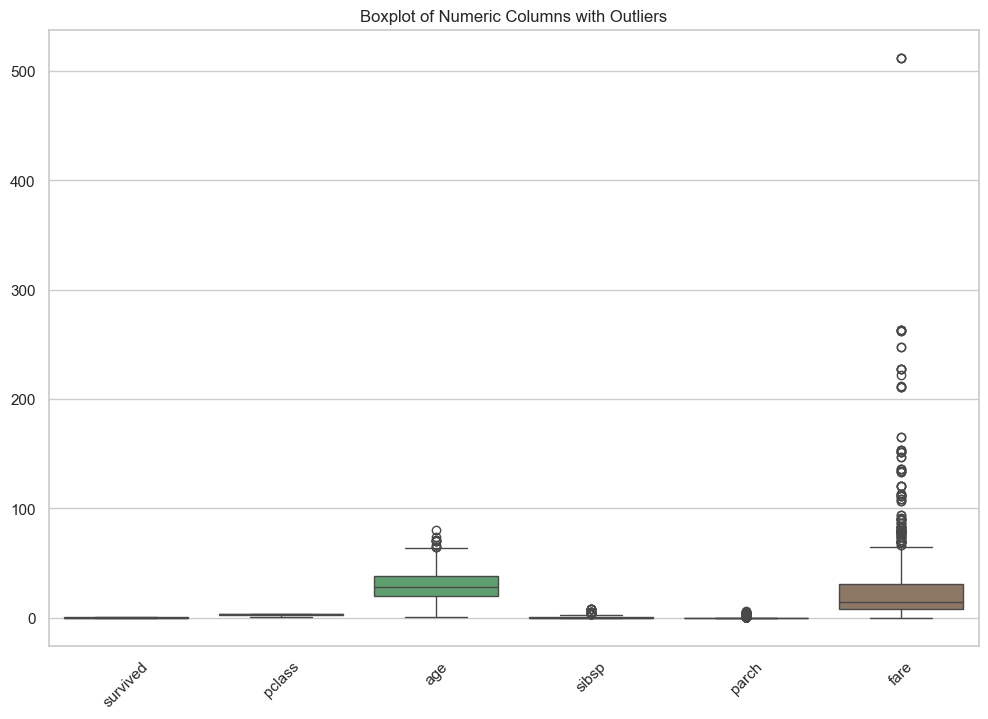

In [173]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numeric Columns with Outliers')
plt.xticks(rotation=45)
plt.show()

# Check For Missing Values 

In [174]:
print(df.isnull())

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

# Find The Missing Values 

In [175]:
missing_values = df.isnull()
missing_values
missing_counts = missing_values.sum()
missing_percentages = (missing_counts / len(df)) * 100

print("Number of missing values in column")
print (missing_counts)
print("Percentage of missing values in column")
missing_percentages

Number of missing values in column
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Percentage of missing values in column


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Fill In Missing Values 

## Missing Age Values

### 19.87% of the age data is missing - filled in using the median as less sensitive to outliers than mean.

In [176]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)
df


C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1581360997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Missing Embark/Embarked Values

### Only a small percentage (0.22%) of embarked and embark_town data is missing - filled in with the mode as they are categorical variables.

In [177]:
mode_embarked = df['embarked'].mode()[0]
mode_embark_town = df['embark_town'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)
df['embark_town'].fillna(mode_embark_town, inplace=True)
df

C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\2061999425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(mode_embarked, inplace=True)
C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\2061999425.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Missing Deck Values 

### A large percentage (77.22%) of the deck data is missing. Filling in missing values for this column is not appropriate as lots of data is missing. It is better to drop this column entirely. 

In [178]:
df.drop('deck', axis=1, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# Drop Rows With Missing Values

### Nothing should change as all missing values have been filled or removed

In [179]:
df.dropna(inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# Check For Duplicates 

### Search for rows which are duplicates of already existing rows 

In [180]:
duplicates = df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# Drop Duplicate Rows

### Drop the rows which are duplicates of already existing rows

In [181]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates
df = df_no_duplicates

## Drop Duplicate Columns 

### Dropped the column for Embarked Town initial as it adds no relevant information that can't be gathered from Town Embarked. Also dropped one of the ticket class columns as both are the same (kept the numerical version). 

In [182]:
columns_to_drop = ['embarked', 'class']
df.drop(columns=columns_to_drop, inplace=True)

C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1425484728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


# Rename Columns

### For better clarity and readability the column headers are changed

In [183]:
df.rename(columns={'survived': 'Survived'}, inplace=True)
df.rename(columns={'pclass': 'Ticket Class'}, inplace=True)
df.rename(columns={'sex': 'Sex'}, inplace=True)
df.rename(columns={'age': 'Age'}, inplace=True)
df.rename(columns={'sibsp': 'Siblings/Spouses'}, inplace=True)
df.rename(columns={'parch': 'Parents/Children'}, inplace=True)
df.rename(columns={'fare': 'Fare'}, inplace=True)
df.rename(columns={'who': 'Man/Woman/Child'}, inplace=True)
df.rename(columns={'adult_male': 'Adult Male'}, inplace=True)
df.rename(columns={'embark_town': 'Town Embarked'}, inplace=True)
df.rename(columns={'alive': 'Alive'}, inplace=True)
df.rename(columns={'alone': 'Travelling Alone'}, inplace=True)
df



C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1641335632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'survived': 'Survived'}, inplace=True)
C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1641335632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'pclass': 'Ticket Class'}, inplace=True)
C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1641335632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Survived,Ticket Class,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Man/Woman/Child,Adult Male,Town Embarked,Alive,Travelling Alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,yes,True


# Descriptive Statistics

## We can get insights into the data which used of descriptive statistics

In [184]:
df.describe()

,Survived,Ticket Class,Age,Siblings/Spouses,Parents/Children,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Count**: 
There are 775 observations for each numeric variable

**Mean**: 
The average survival rate is approximately 41.29%
The average ticket class is approximately 2.25
The average age is approximately 29.58 years
The average number of siblings/spouses is approximately 0.53
The average number of parents/children is approximately 0.42
The average fare is approximately 34.88

**Standard Deviation (Std)**: 
The standard deviation of survival rate is approximately 0.49
The standard deviation of age is approximately 13.77
The standard deviation of fare is approximately 52.41

**Min**: 
The minimum survival rate is 0
The minimum ticket class is 1
The minimum age is 0.42 years
The minimum number of siblings/spouses and parents/children is 0
The minimum fare is 0

**25th Percentile (Q1)**: 
25% of passengers survived
25% of passengers belonged to the first class
25% of passengers were aged 21 or younger
25% of passengers had at least one sibling/spouse or parent/child onboard
25% of fares were below $8.05

**50th Percentile (Median or Q2)**:
50% of passengers survived.
50% of passengers belonged to the third class.
The median age of passengers is 28.
50% of passengers had no siblings/spouses or parents/children onboard.
The median fare is $15.90.

**75th Percentile (Q3)**: 
75% of passengers survived
75% of passengers belonged to the third class
75% of passengers were aged 36 or younger
75% of passengers had at least one sibling/spouse or parent/child onboard
75% of fares were below $34.20

**Max**: 
The maximum survival rate is 1, indicating all passengers survived
The maximum ticket class is 3, indicating the highest class
The maximum age is 80 years, indicating the oldest passenger
The maximum number of siblings/spouses is 8
The maximum number of parents/children is 6
The maximum fare is $512.33, indicating the highest fare paid by a passenger

# Average Fare and Age For Each Class

In [185]:
class_means = df.groupby('Ticket Class')[['Fare', 'Age']].mean()
class_means

,Fare,Age
Ticket Class,,
1,85.675199,36.921048
2,21.889279,29.791646
3,13.588850,25.651297


# Adding New Column To Show Fare As A Percentage Of The Total

In [186]:
total_fare_per_class = df.groupby('Ticket Class')['Fare'].transform('sum') # calculate fare for each class & get sums
fare_percentage = (df['Fare'] / total_fare_per_class) * 100 # calculate percentage for each passenger 
df['Fare Percentage'] = fare_percentage # assign percentage to new column 
df

C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\360995914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare Percentage'] = fare_percentage # assign percentage to new column


,Survived,Ticket Class,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Man/Woman/Child,Adult Male,Town Embarked,Alive,Travelling Alone,Fare Percentage
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,no,False,0.133049
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False,0.396199
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,yes,True,0.145436
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,yes,False,0.295135
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,no,True,0.147730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,woman,False,Queenstown,no,False,0.534489
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,yes,True,0.166743
888,0,3,female,28.0,1,2,23.4500,woman,False,Southampton,no,False,0.430344
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,yes,True,0.166743


# Comparing Male Survivors vs Female Survivors

### We can see that there are more than twice as many female survivors as there are male survivors 

In [187]:
survivors = df[df['Survived'] == 1]
female_survivors = survivors[survivors['Sex'] == 'female'].shape[0]
male_survivors = survivors[survivors['Sex'] == 'male'].shape[0]
print("Number of female survivors:", female_survivors)
print("Number of male survivors:", male_survivors)

Number of female survivors: 216
Number of male survivors: 104


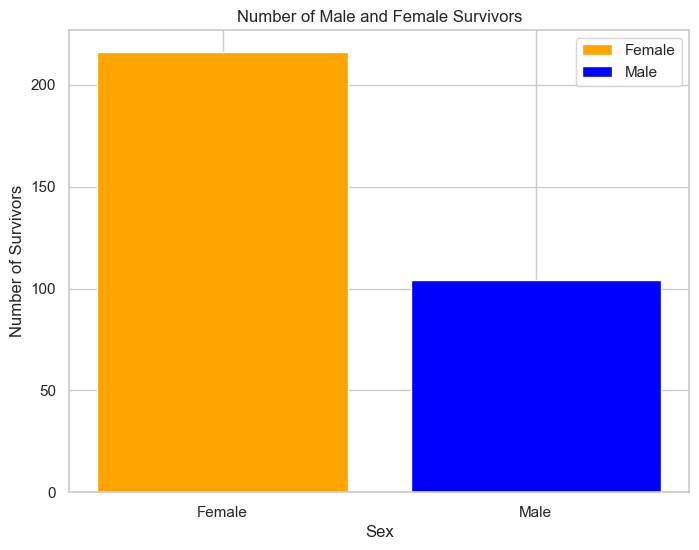

In [188]:
plt.figure(figsize=(8, 6))
plt.bar("Female", female_survivors, color='orange', label='Female')
plt.bar("Male", male_survivors, color='blue', label='Male', bottom=0)
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors')
plt.legend()
plt.show()

# Other Interesting Insights 

## Survival Rates by Gender and Class

In [189]:
survival_rates = df.groupby(['Sex', 'Ticket Class'])['Survived'].mean()
survival_rates = survival_rates.reset_index()
survival_rates_pivot = survival_rates.pivot(index='Ticket Class', columns='Sex', values='Survived')

print(survival_rates_pivot)

Sex             female      male
Ticket Class                    
1             0.967742  0.367521
2             0.916667  0.184783
3             0.472441  0.160584


## Age Distribution of Passengers

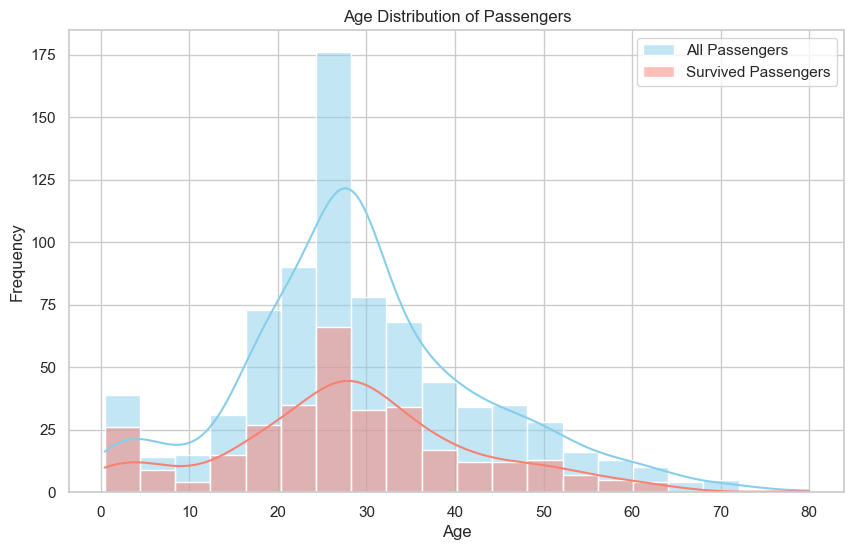

In [190]:
sns.set(style="whitegrid")
survived_passengers = df[df['Survived'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue', bins=20, label='All Passengers')

sns.histplot(data=survived_passengers, x='Age', kde=True, color='salmon', bins=20, label='Survived Passengers')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.legend()

plt.show()

## Survival Rate Based On Fare And Age 

<Axes: xlabel='Age', ylabel='Fare'>

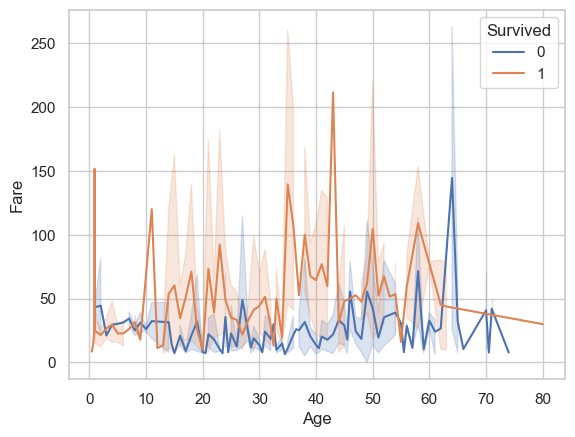

In [191]:
sns.lineplot(x='Age', y='Fare', hue='Survived', data=df)


## Comparing Class, Fare and Embarked (location)

### This shows the average fare for each passenger based on where Embarked from and what Ticket Class they were 

In [192]:
fp = df.pivot_table(index='Ticket Class', columns='Town Embarked', values='Fare', aggfunc=np.mean)
fp

C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\2971623770.py:1: FutureWarning: The provided callable <function mean at 0x00000131E309B880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fp = df.pivot_table(index='Ticket Class', columns='Town Embarked', values='Fare', aggfunc=np.mean)


Town Embarked,Cherbourg,Queenstown,Southampton
Ticket Class,,,
1,106.072942,90.000000,72.061900
2,25.358335,12.350000,21.678472
3,11.634778,11.970677,14.248362


## Family Size and Survival

### Survival rate based on whether the passenger was travelling with any family or not 

In [193]:
df['Family Size'] = df['Siblings/Spouses'] + df['Parents/Children']
df['Travelling Alone'] = (df['Family Size'] == 0)
survival_rates_family = df.groupby('Travelling Alone')['Survived'].mean()

print(survival_rates_family)


Travelling Alone
False    0.511834
True     0.336384
Name: Survived, dtype: float64


C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\558641301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family Size'] = df['Siblings/Spouses'] + df['Parents/Children']
C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\558641301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Travelling Alone'] = (df['Family Size'] == 0)


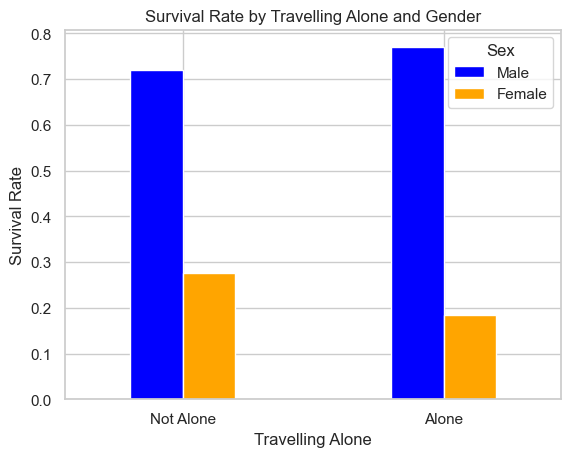

In [194]:
survival_rates = df.groupby(['Travelling Alone', 'Sex'])['Survived'].mean().unstack()

ax = survival_rates.plot(kind='bar', color=['blue', 'orange'], width=0.4)

plt.xlabel('Travelling Alone')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Travelling Alone and Gender')
plt.xticks([0, 1], ['Not Alone', 'Alone'], rotation=0)  # Replace the labels accordingly

plt.legend(title='Sex', labels=['Male', 'Female'])

# Show plot
plt.show()

## Embarkation Port and Survival

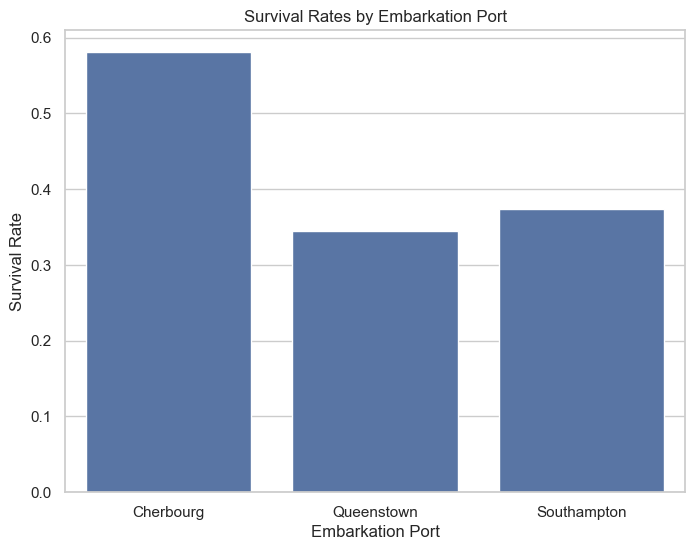

Number of unique embarkation ports: 3


In [195]:
survival_rates_embarked = df.groupby('Town Embarked')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_embarked.index, y=survival_rates_embarked.values)
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Embarkation Port')
plt.show()

num_embark_ports = df['Town Embarked'].nunique()
print("Number of unique embarkation ports:", num_embark_ports)

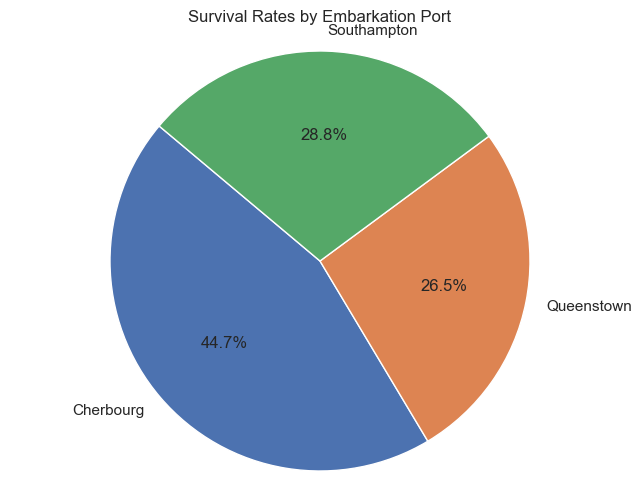

In [196]:
survival_rates_embarked = df.groupby('Town Embarked')['Survived'].mean()

plt.figure(figsize=(8, 6))
plt.pie(survival_rates_embarked, labels=survival_rates_embarked.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Rates by Embarkation Port')

# Show plot
plt.axis('equal')  
plt.show()


# Correlation Analysis

## Heat Map 

C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1370702184.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Man/Woman/Child'] = df['Man/Woman/Child'].replace({'man': 0, 'woman': 1, 'child': 2})
C:\Users\raj_a\AppData\Local\Temp\ipykernel_58848\1370702184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Man/Woman/Child'] = df['Man/Woman/Child'].replace({'man': 0, 'woman': 1, 'child': 2})


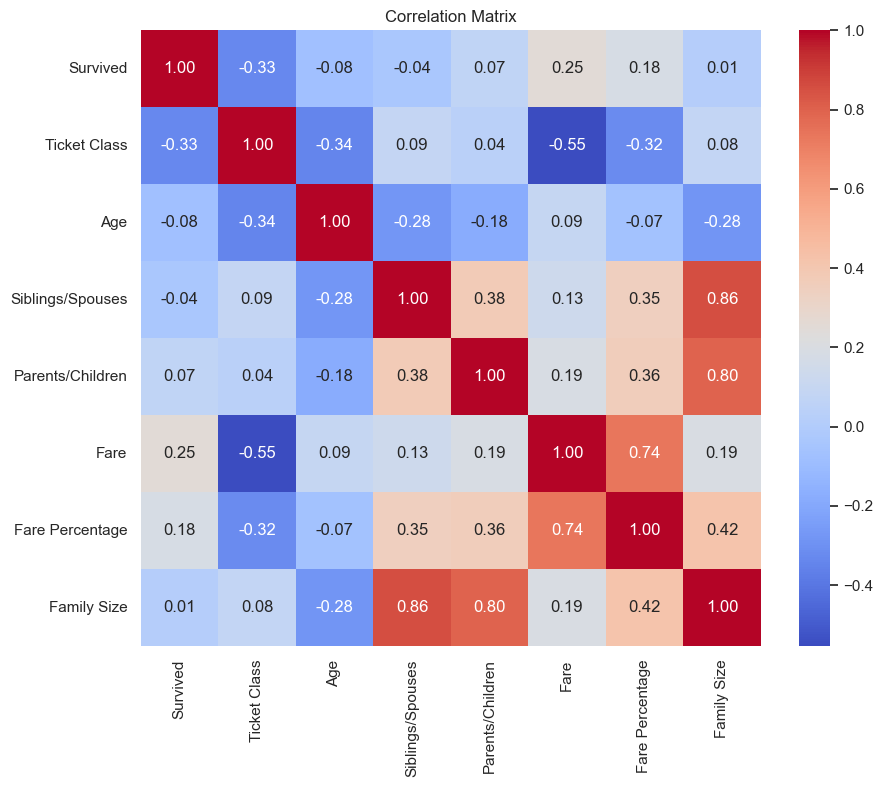

In [197]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df['Man/Woman/Child'] = df['Man/Woman/Child'].replace({'man': 0, 'woman': 1, 'child': 2})

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



# Violin Plot To Show Age Distribution By Ticket Class

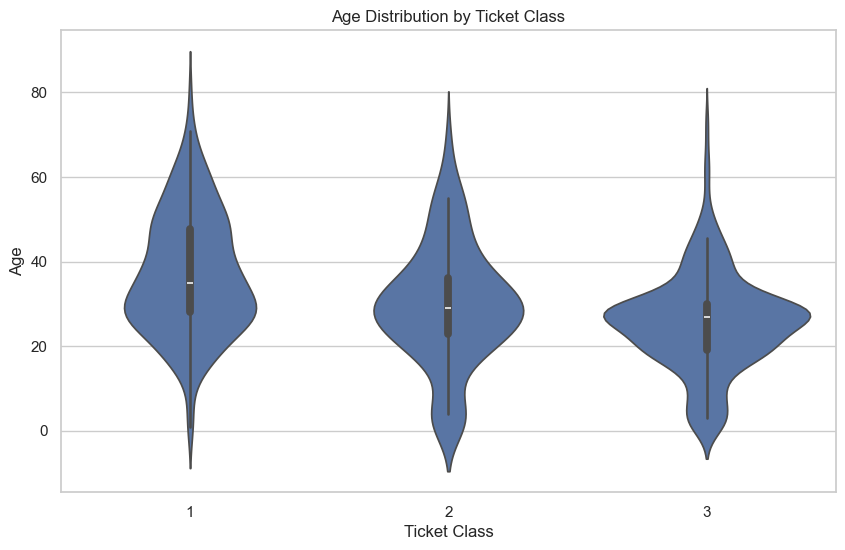

In [198]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Ticket Class', y='Age')
plt.title('Age Distribution by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.show()



# Pair Plot To Show Relationships Between Variables(Numerical)

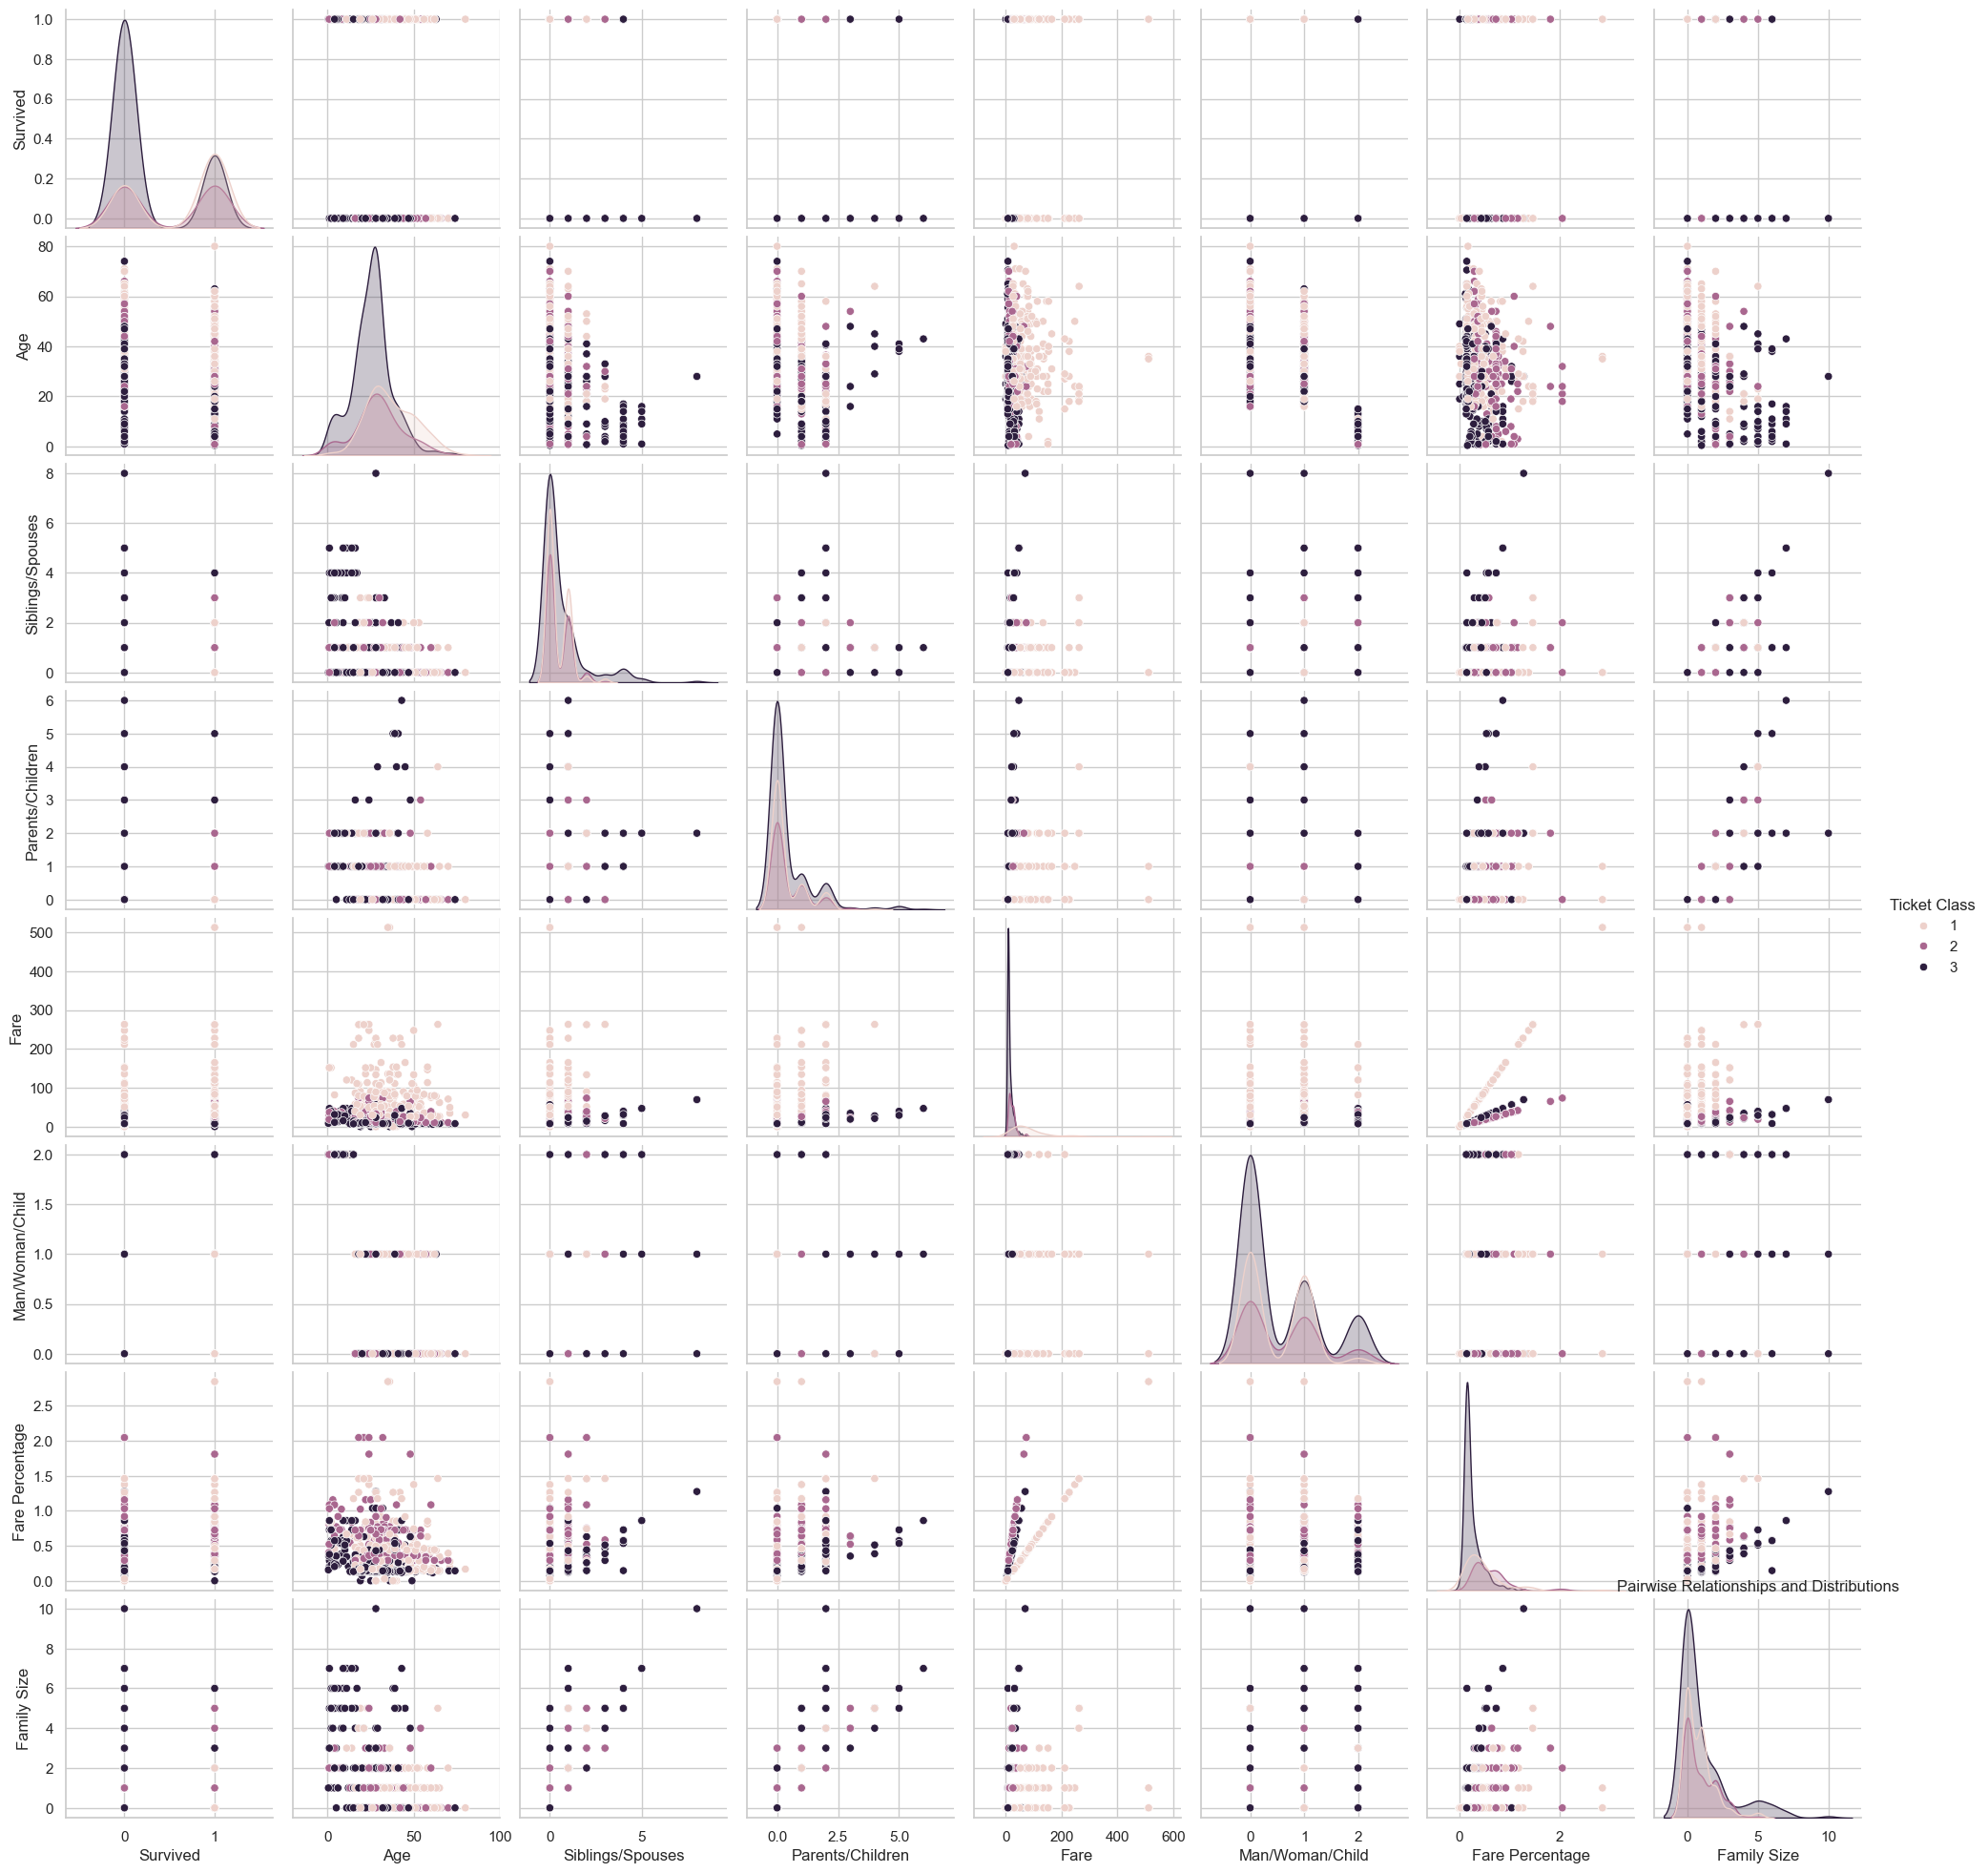

In [199]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), hue="Ticket Class")
plt.title('Pairwise Relationships and Distributions')
plt.show()

# Pair Grid

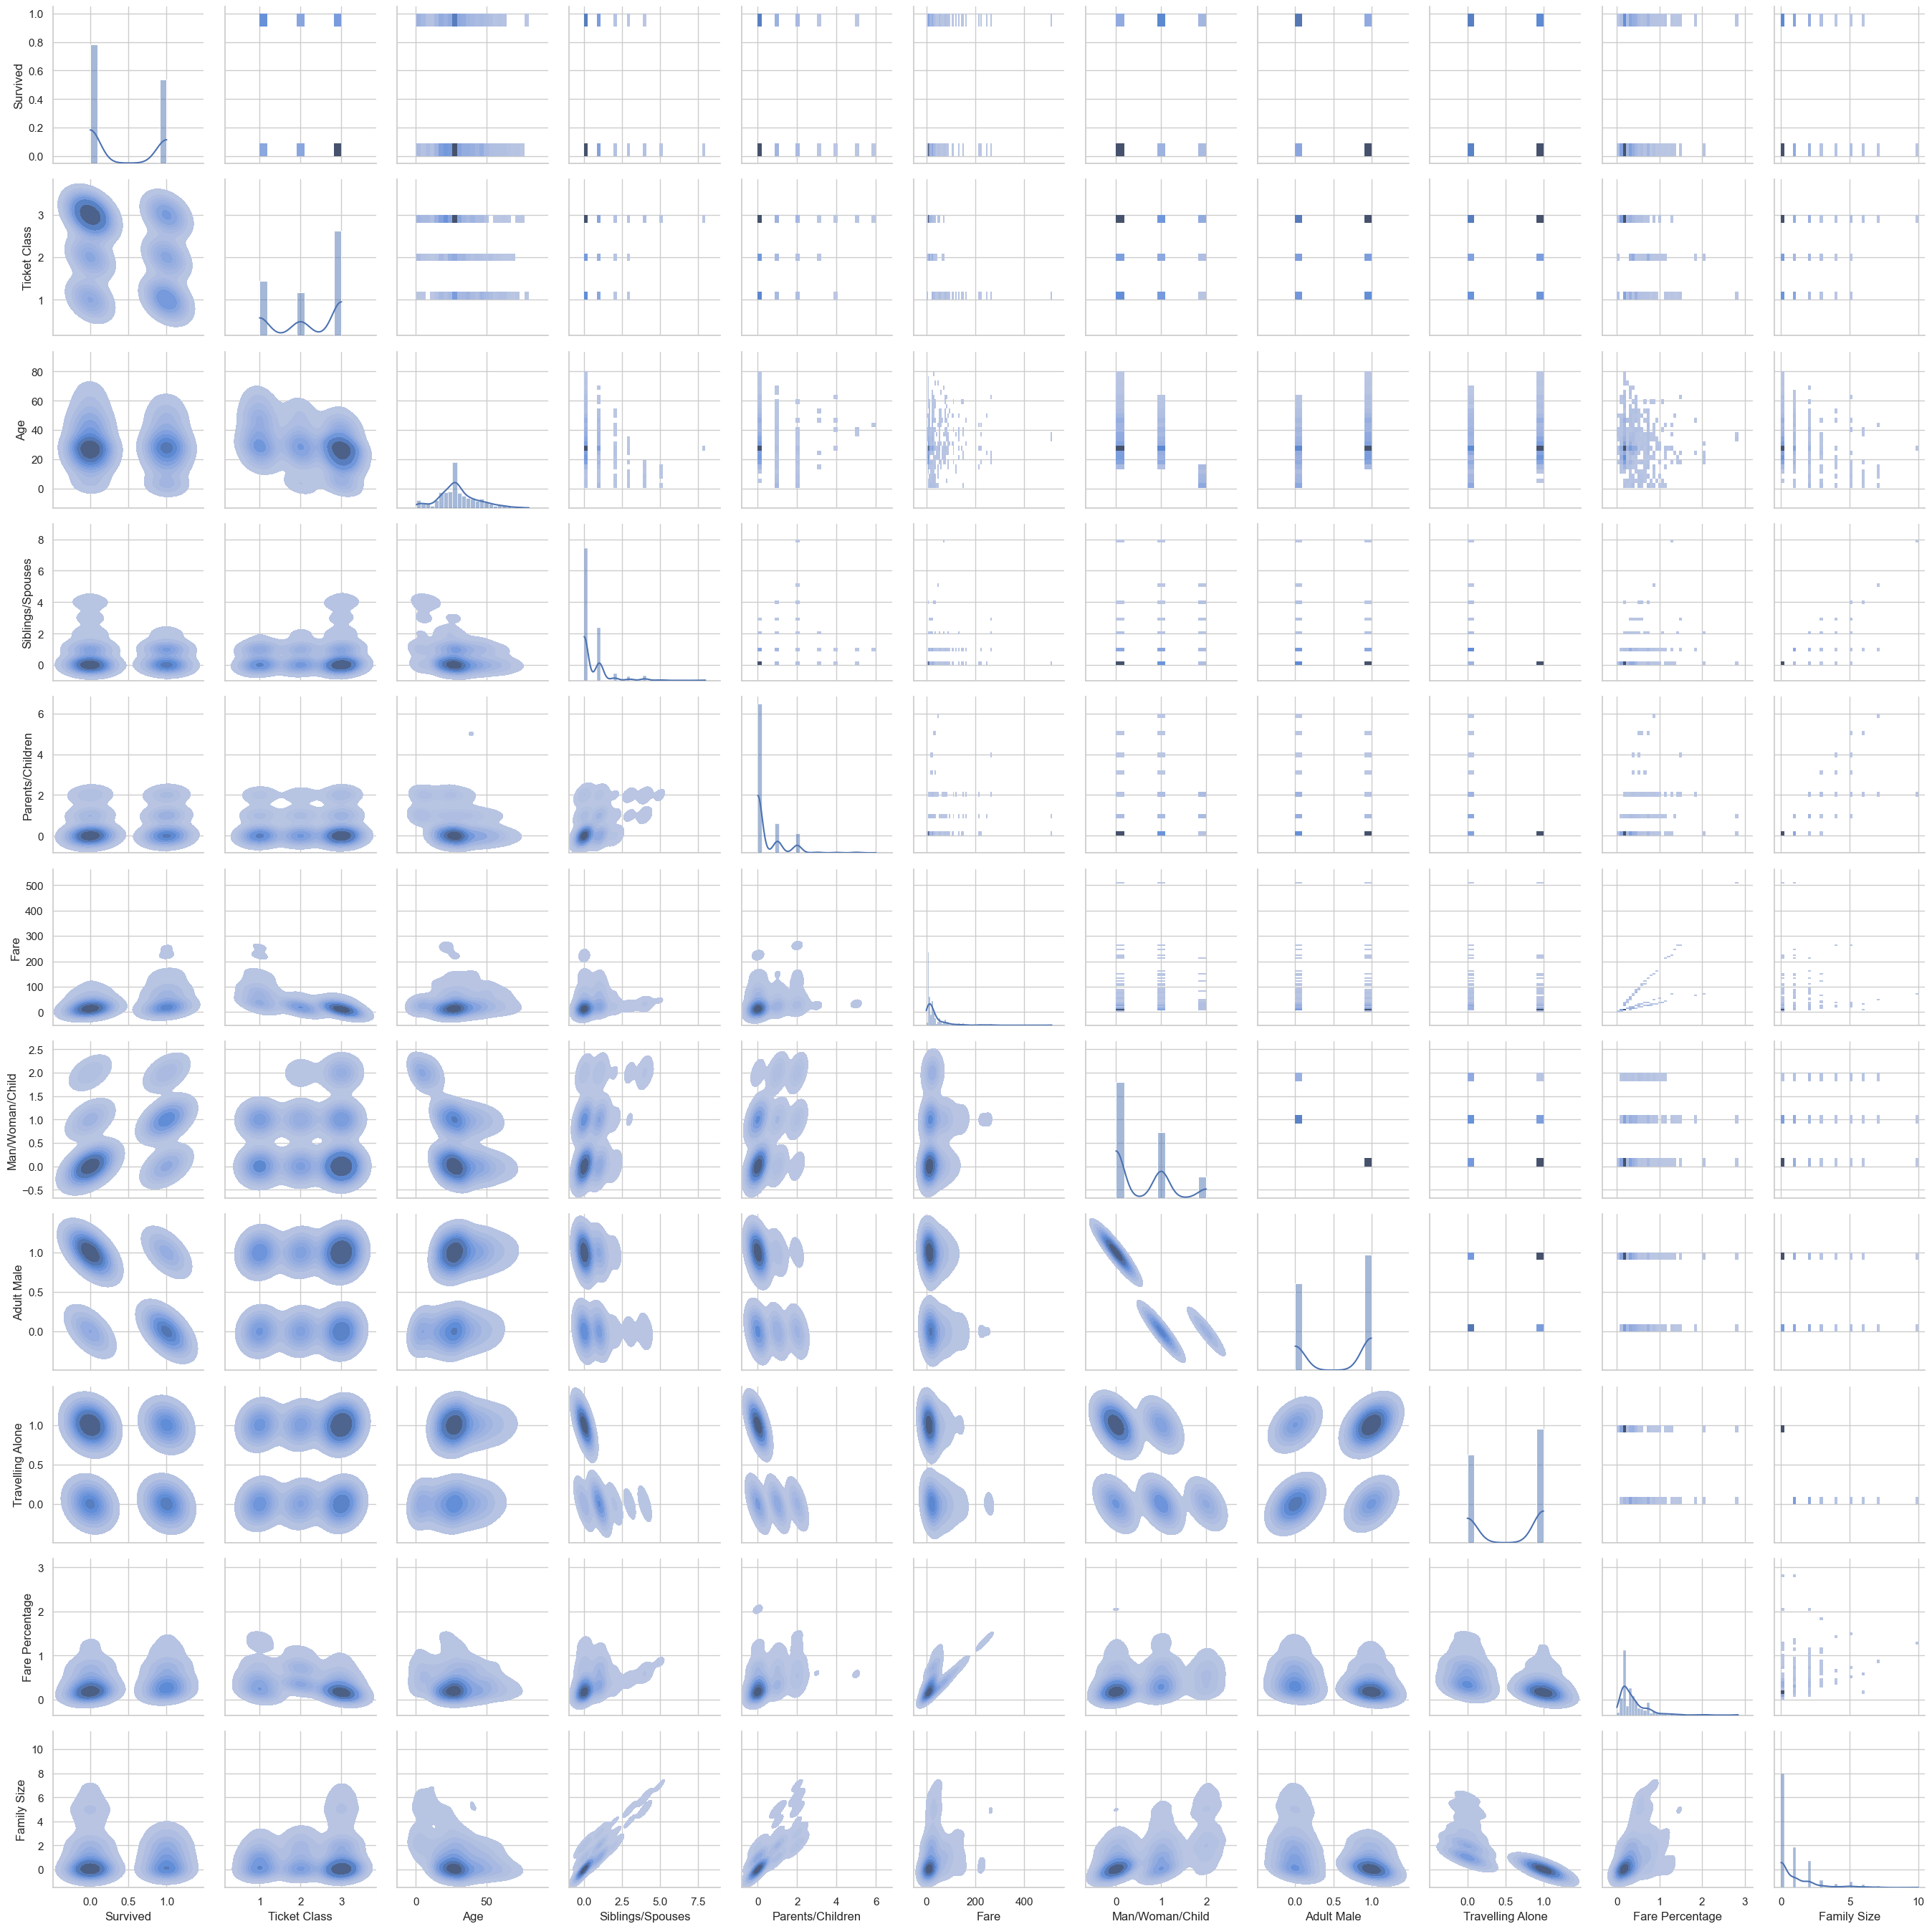

In [203]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g